# 模拟退火算法

一个视频速通原理：https://www.bilibili.com/video/BV1j64y1Y7FB/?spm_id_from=333.337.search-card.all.click&vd_source=4bccf0bae6366f8cf252ccd21d3e6844

这段代码实现了一个使用模拟退火算法（Simulated Annealing）来解决旅行商问题（Traveling Salesman Problem，TSP）的类。TSP是一个经典的组合优化问题，目标是找到一条最短路径，让旅行商从起点经过每个城市一次，最后回到起点，同时遍历所有城市且路径最短。

现在我们来逐步解释这段代码中定义的每个函数的功能：

__init__(self, n, maxit, maxitpermtemp, T)：
这是类的初始化方法（构造函数），用于创建SA（Simulated Annealing）类的对象并初始化属性。它接收四个参数：

- n: 表示城市的数量，即旅行商要访问的城市数目。
- maxit: 最大迭代次数，即模拟退火算法的总迭代次数。
- maxitpermtemp: 在每个温度下的最大迭代次数。
- T: 初始温度。

swap(self, route)：
这是用于交换两个随机位置的城市编号的方法。它接收一个参数route，表示一个旅行路径（城市编号列表）。函数首先生成两个不同的随机索引，然后将这两个位置上的城市编号进行交换，得到一个新的路径。

cost(self, route)：
这是用于计算给定路径的总距离（成本）的方法。它接收一个参数route，表示一个旅行路径（城市编号列表）。函数会将路径上相邻城市间的距离相加，得到整个路径的总距离。

main(self)：
这是类的主要方法，用于执行模拟退火算法来解决TSP问题。它不接收任何参数。函数首先初始化一个初始解（旅行路径），然后开始迭代算法。在每个迭代中，会进行一些随机的路径交换操作，并根据一定的概率接受更优或者差的解。在整个算法迭代过程中，会记录每次迭代的最优解的成本值。最后，函数调用draw()方法绘制最终的最优路径和成本曲线。

draw(self, tour)：
这个方法用于绘制旅行商问题的解决方案。它接收一个参数tour，表示一个旅行路径（城市编号列表）。函数会将城市的坐标和最优路径以及成本曲线绘制在两个不同的图表中，并在图表中展示结果。

最后，通过创建一个SA类的对象TSP并调用TSP.main()，我们可以执行模拟退火算法来解决TSP问题，并在图表中展示最优解的路径和成本曲线。

In [5]:
import os
for dirname, _, filenames in os.walk('.\datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# 任何在这个工程文件夹的datasets子文件夹中的文件将被输出

#忽略警告
import warnings
    warnings.filterwarnings('ignore')

.\datasets\data.xlsx
.\datasets\iris.csv
.\datasets\Live.csv
.\datasets\Mall_Customers.csv
.\datasets\users.xlsx
.\datasets\users_2.xlsx


In [17]:
ix=np.random.permutation(10)
print(ix)
np.random.rand()

[2 6 5 1 7 4 9 3 0 8]


0.2742859615369323

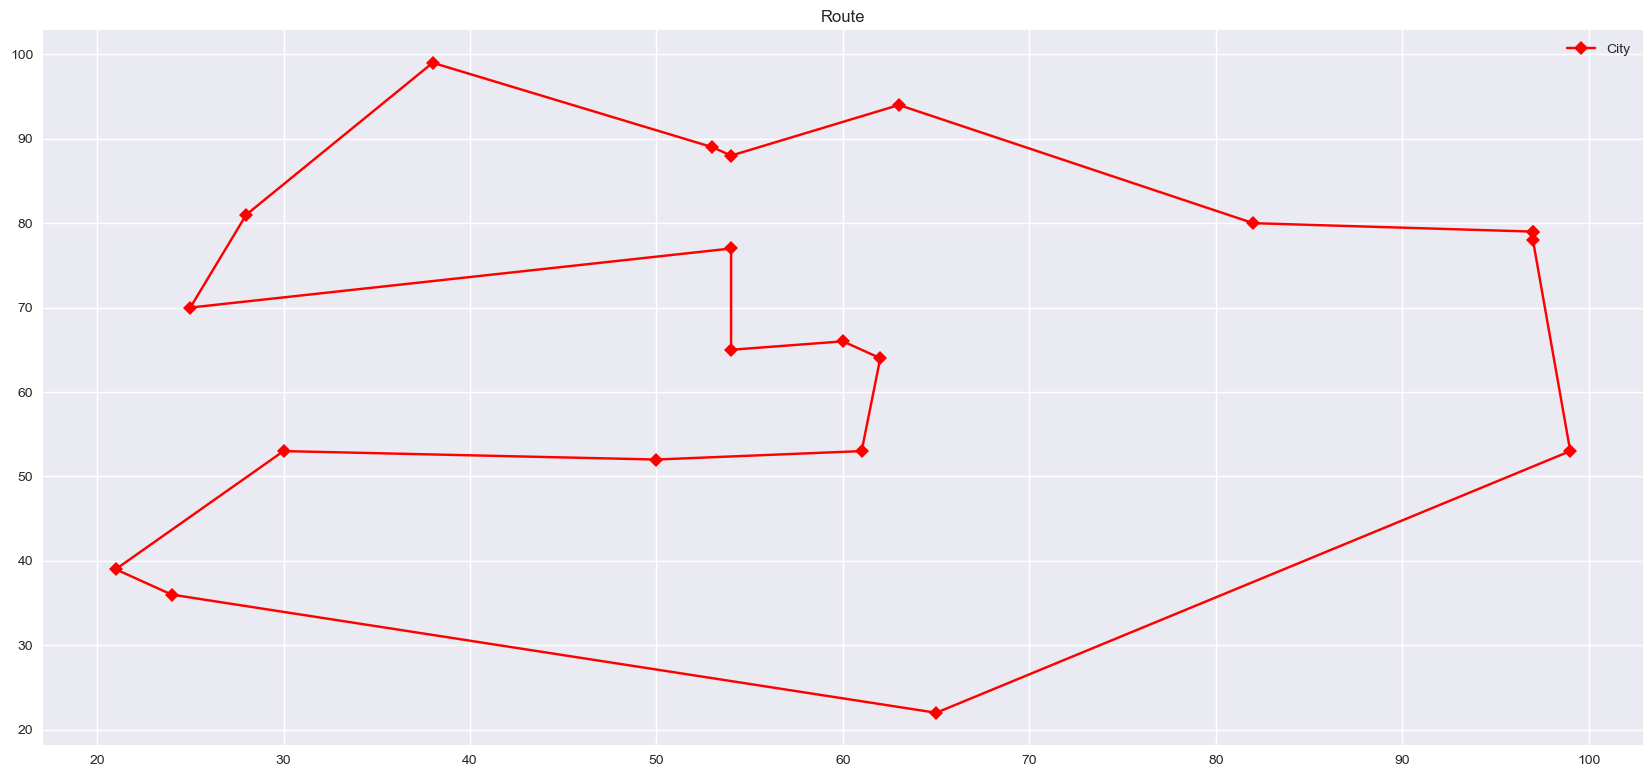

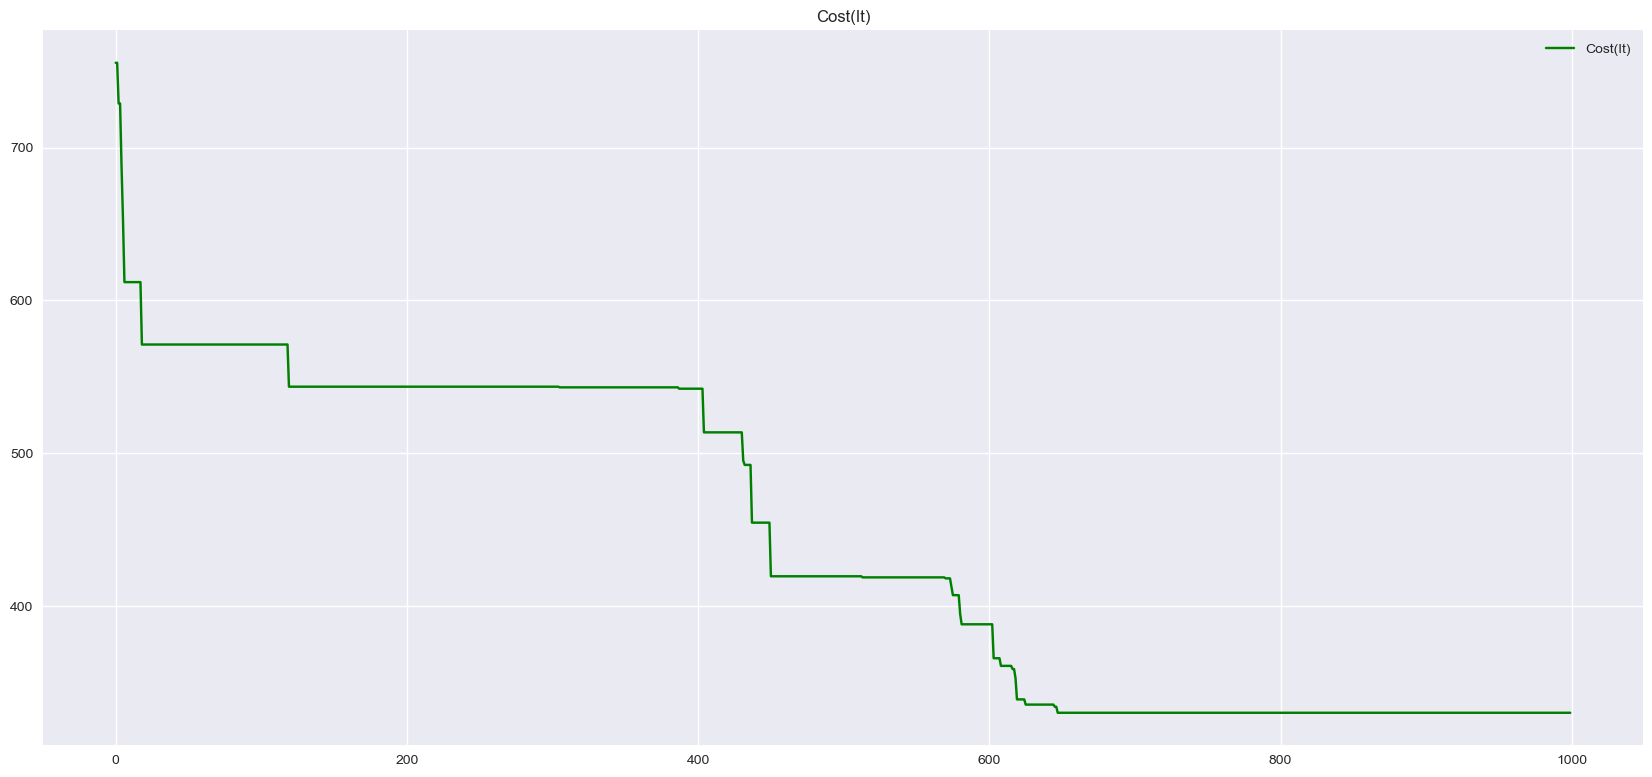

Best Route: [11  2  0  1  9 14 18 19  3  7 16  6 15 12 17 13 10  5  4  8]
Total Distance: 330.047 km


In [22]:
"""
n = Number of Cities (Random Coordinate)
Generates random coordinates based on the number of cities received 
from the user and returns the shortest route from the starting point 
to the starting point again.
"""

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

class SA(object):
    def __init__(self,n,maxit,maxitpermtemp,T):
        self.n = n #城市的数量
        self.maxit = maxit    
        self.maxitpermtemp = maxitpermtemp  #每个温度下最大迭代次数
        self.x = np.random.randint(20,100,self.n)    #x坐标
        self.y = np.random.randint(20,100,self.n)    #y坐标
        self.D = np.zeros((self.n,self.n))           #创建一个nxn的全0矩阵
        self.tour = np.random.permutation(self.n)    #生成长度为n的随机排列数组，表示旅行的初始路径，并将结果存储在矩阵self.D中
        self.bestcost = np.zeros((self.maxit,1))     #生成一个大小是self.maxit x 1的全0矩阵，用于存储每次迭代的最优解的成本值
        self.T = T
        for i in range(0,self.n-1):
            for j in range(self.n):
                self.D[i,j]=np.sqrt((self.x[i]-self.x[j])**2+(self.y[i]-self.y[j])**2)
                self.D[j,i]=self.D[i,j]
        
        # 生成距离矩阵D，方便计算
        
    ### 随机交换两个城市，首先通过生成一个随机全排列，然后选择第一个和第二个位置上的城市序号，进行路径的替换
    def swap(self,route):
        ix=np.random.permutation(len(route))
        i1=ix[1]
        i2=ix[2]
        newroute = np.copy(route)
        newroute[i1],newroute[i2] = newroute[i2],newroute[i1]
        return newroute
    
    ### 计算闭合路径的长度，也就是cost
    def cost(self,route):
        L=0 
        route = np.append(route,route[0]) #把起始点添加进来，这样可以计算闭合路径了
        for i in range(self.n):
            L=L+self.D[route[i],route[i+1]]
        return L
    
    def main(self):
        
        sol_tour = self.tour
        sol_cost = self.cost(sol_tour)
        
        bestsol_tour = sol_tour 
        bestsol_cost = sol_cost
        
        # 初始化最佳路径和最短距离
        
        for it in range(self.maxit):
            for it2 in range(self.maxitpermtemp):
                newsol_tour = self.swap(sol_tour)    #新的路径，使用swap函数实现
                newsol_cost = self.cost(newsol_tour) #计算新路径的cost
                
                if newsol_cost < sol_cost:           #如果新路径的cost小于当前路径的cost，则该路径是最优路径
                    sol_cost = newsol_cost           
                    sol_tour = newsol_tour
                
                else:                                #否则，首先计算新路径多出了多少距离，代入函数exp(-d/T)    
                    delta = (newsol_cost - sol_cost) #当插值小或温度大的时候，这个值接近1，当插值大或温度小的时候接近0
                    p = np.exp(-delta/self.T)
                    
                    if np.random.rand() < p:         #生成一个服从01均匀分布的随机数，如果这个数小于p，则选择新路径为当前路径
                        sol_cost = newsol_cost
                        sol_tour = newsol_tour
             
                if sol_cost < bestsol_cost:          #决定是否替换当前的最佳路径和最低花费
                    bestsol_cost = sol_cost
                    bestsol_tour = sol_tour
            
            self.bestcost[it] = bestsol_cost         #更新当前迭代次数（温度的迭代）下的最低cost，即最短距离
            self.T = self.T*0.99                     #当前温度的maxitpertemp次迭代后，温度降低
            
        self.draw(bestsol_tour)
        
        print("Best Route:",bestsol_tour)
        print("Total Distance: {} km".format(bestsol_cost.round(3)))
    
    def draw(self,tour):
        
        tour = np.append(tour,tour[0])     #为了作出闭合路径
        plt.axes([0,0,2,1.3])
        # 创建一个新的图表，设置其位置和大小。这里的[0, 0, 2, 1.3]表示图表左下角的坐标为(0, 0)
        # 宽度为2，高度为1.3。这样的设置可以让两个图表垂直排列在一起
        
        plt.plot(self.x[tour],self.y[tour],'rD-',label="City")
        # 在图表中绘制城市坐标点，采用红色钻石形状的标记，并连接相邻城市以表示旅行路径
        # self.x[tour]和self.y[tour]分别表示按照旅行路径tour获取对应的城市的x坐标和y坐标
        # 'rD-'表示绘制红色的钻石形状标记并使用实线连接相邻点。
        
        plt.title("Route")
        plt.legend(loc="best")
        plt.show()
        
        plt.axes([0,0,2,1.3])
        plt.plot(self.bestcost,'g',label="Cost(It)")
        plt.title("Cost(It)")
        plt.legend(loc="best")
        plt.show()      
        
TSP = SA(n=20,maxit=1000,maxitpermtemp=30,T=2000)
TSP.main()

# 多张图绘制
因为这个受随机数的影响，因此执行不同次数得到的结果也是不同的，接下来我们重复三次绘制

Best Route: [ 3 16 17 10  5  2  0 11  1 12 18  4 14  7 19  6 13  9 15  8]
Total Distance: 315.264 km
Best Route: [13 18  1 10  5  2  0 11 12  4 14  7 19  6  9 15  8  3 16 17]
Total Distance: 353.216 km
Best Route: [ 2  0 11  4 14  7 19  6 13 17 16  3  8 15  9 18 12  1 10  5]
Total Distance: 364.902 km


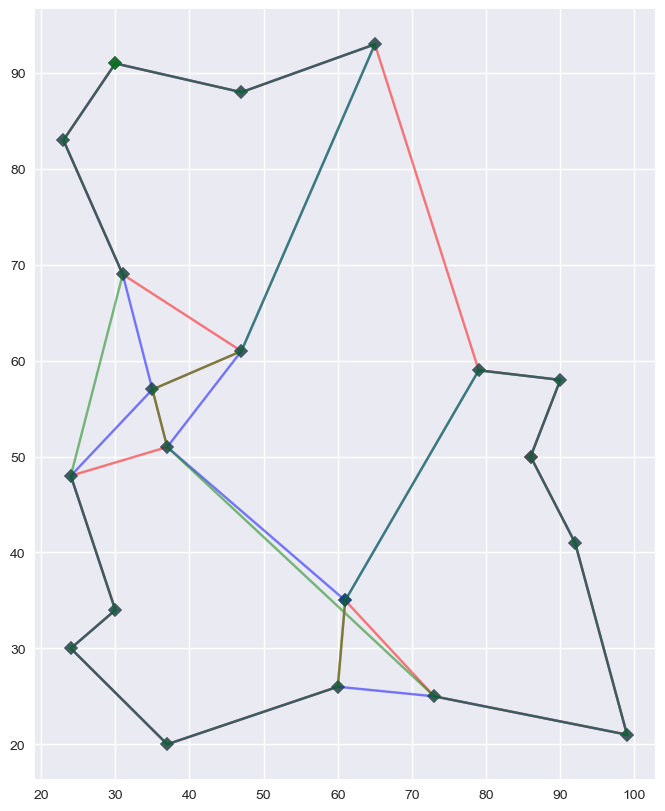

In [35]:
"""
n = Number of Cities (Random Coordinate)
Generates random coordinates based on the number of cities received 
from the user and returns the shortest route from the starting point 
to the starting point again.
"""

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

class SA_myversion(object):
    def __init__(self,n,maxit,maxitpermtemp,T):
        self.n = n #城市的数量
        self.maxit = maxit    
        self.maxitpermtemp = maxitpermtemp  #每个温度下最大迭代次数
        self.x = np.random.randint(20,100,self.n)    #x坐标
        self.y = np.random.randint(20,100,self.n)    #y坐标
        self.D = np.zeros((self.n,self.n))           #创建一个nxn的全0矩阵
        self.tour = np.random.permutation(self.n)    #生成长度为n的随机排列数组，表示旅行的初始路径，并将结果存储在矩阵self.D中
        self.bestcost = np.zeros((self.maxit,1))     #生成一个大小是self.maxit x 1的全0矩阵，用于存储每次迭代的最优解的成本值
        self.T = T
        for i in range(0,self.n-1):
            for j in range(self.n):
                self.D[i,j]=np.sqrt((self.x[i]-self.x[j])**2+(self.y[i]-self.y[j])**2)
                self.D[j,i]=self.D[i,j]
        
        # 生成距离矩阵D，方便计算
        
    ### 随机交换两个城市，首先通过生成一个随机全排列，然后选择第一个和第二个位置上的城市序号，进行路径的替换
    def swap(self,route):
        ix=np.random.permutation(len(route))
        i1=ix[1]
        i2=ix[2]
        newroute = np.copy(route)
        newroute[i1],newroute[i2] = newroute[i2],newroute[i1]
        return newroute
    
    ### 计算闭合路径的长度，也就是cost
    def cost(self,route):
        L=0 
        route = np.append(route,route[0]) #把起始点添加进来，这样可以计算闭合路径了
        for i in range(self.n):
            L=L+self.D[route[i],route[i+1]]
        return L
    
    def main(self, color):
        
        sol_tour = self.tour
        sol_cost = self.cost(sol_tour)
        
        bestsol_tour = sol_tour 
        bestsol_cost = sol_cost
        
        # 初始化最佳路径和最短距离
        
        for it in range(self.maxit):
            for it2 in range(self.maxitpermtemp):
                newsol_tour = self.swap(sol_tour)    #新的路径，使用swap函数实现
                newsol_cost = self.cost(newsol_tour) #计算新路径的cost
                
                if newsol_cost < sol_cost:           #如果新路径的cost小于当前路径的cost，则该路径是最优路径
                    sol_cost = newsol_cost           
                    sol_tour = newsol_tour
                
                else:                                #否则，首先计算新路径多出了多少距离，代入函数exp(-d/T)    
                    delta = (newsol_cost - sol_cost) #当插值小或温度大的时候，这个值接近1，当插值大或温度小的时候接近0
                    p = np.exp(-delta/self.T)
                    
                    if np.random.rand() < p:         #生成一个服从01均匀分布的随机数，如果这个数小于p，则选择新路径为当前路径
                        sol_cost = newsol_cost
                        sol_tour = newsol_tour
             
                if sol_cost < bestsol_cost:          #决定是否替换当前的最佳路径和最低花费
                    bestsol_cost = sol_cost
                    bestsol_tour = sol_tour
            
            self.bestcost[it] = bestsol_cost         #更新当前迭代次数（温度的迭代）下的最低cost，即最短距离
            self.T = self.T*0.99                     #当前温度的maxitpertemp次迭代后，温度降低
            
        self.draw(bestsol_tour, color)
        
        print("Best Route:",bestsol_tour)
        print("Total Distance: {} km".format(bestsol_cost.round(3)))
    
    def draw(self,tour,color):
        colors=['rD-','bD-','gD-']
        tour = np.append(tour,tour[0])     #为了作出闭合路径
        
        ax.plot(self.x[tour],self.y[tour],colors[color],label="City",alpha=0.5)
        # 在图表中绘制城市坐标点，采用红色钻石形状的标记，并连接相邻城市以表示旅行路径
        # self.x[tour]和self.y[tour]分别表示按照旅行路径tour获取对应的城市的x坐标和y坐标
        # 'rD-'表示绘制红色的钻石形状标记并使用实线连接相邻点。
        
        
TSP = SA_myversion(n=20,maxit=1000,maxitpermtemp=30,T=2000)
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
TSP.main(0)
TSP.main(1)
TSP.main(2)
plt.show()  

# 后记
一道例题：
https://www.bilibili.com/video/BV1mT4y117Xa/?spm_id_from=333.788.recommend_more_video.-1&vd_source=4bccf0bae6366f8cf252ccd21d3e6844